<a href="https://colab.research.google.com/github/delowarshizar/Practice/blob/main/week7_1453ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd

# Your minimax function (unchanged)
def minmax(curDepth, nodeIndex, maxTurn, scores, targetDepth):
    if curDepth == targetDepth:
        return scores[nodeIndex]

    if maxTurn:
        return max(
            minmax(curDepth + 1, nodeIndex * 2, False, scores, targetDepth),
            minmax(curDepth + 1, nodeIndex * 2 + 1, False, scores, targetDepth)
        )
    else:
        return min(
            minmax(curDepth + 1, nodeIndex * 2, True, scores, targetDepth),
            minmax(curDepth + 1, nodeIndex * 2 + 1, True, scores, targetDepth)
        )

# === Step 1: Read scores from CSV ===
csv_path = "/content/personal_profiles.csv"  # Replace with your CSV file path
df = pd.read_csv(csv_path)

# Assuming the scores are in a column named 'Score'
scores = df["Age"].tolist()

# Check length of scores is power of two for full binary tree
length = len(scores)
if (length & (length - 1)) != 0:
    raise ValueError("Number of scores must be a power of 2 for a perfect binary tree")

# Calculate tree depth
treeDepth = int(math.log2(length))

# Run minimax
optimal_value = minmax(0, 0, True, scores, treeDepth)
print("The optimal value is:", optimal_value)


The optimal value is: 55


The optimal minimax value is: 55


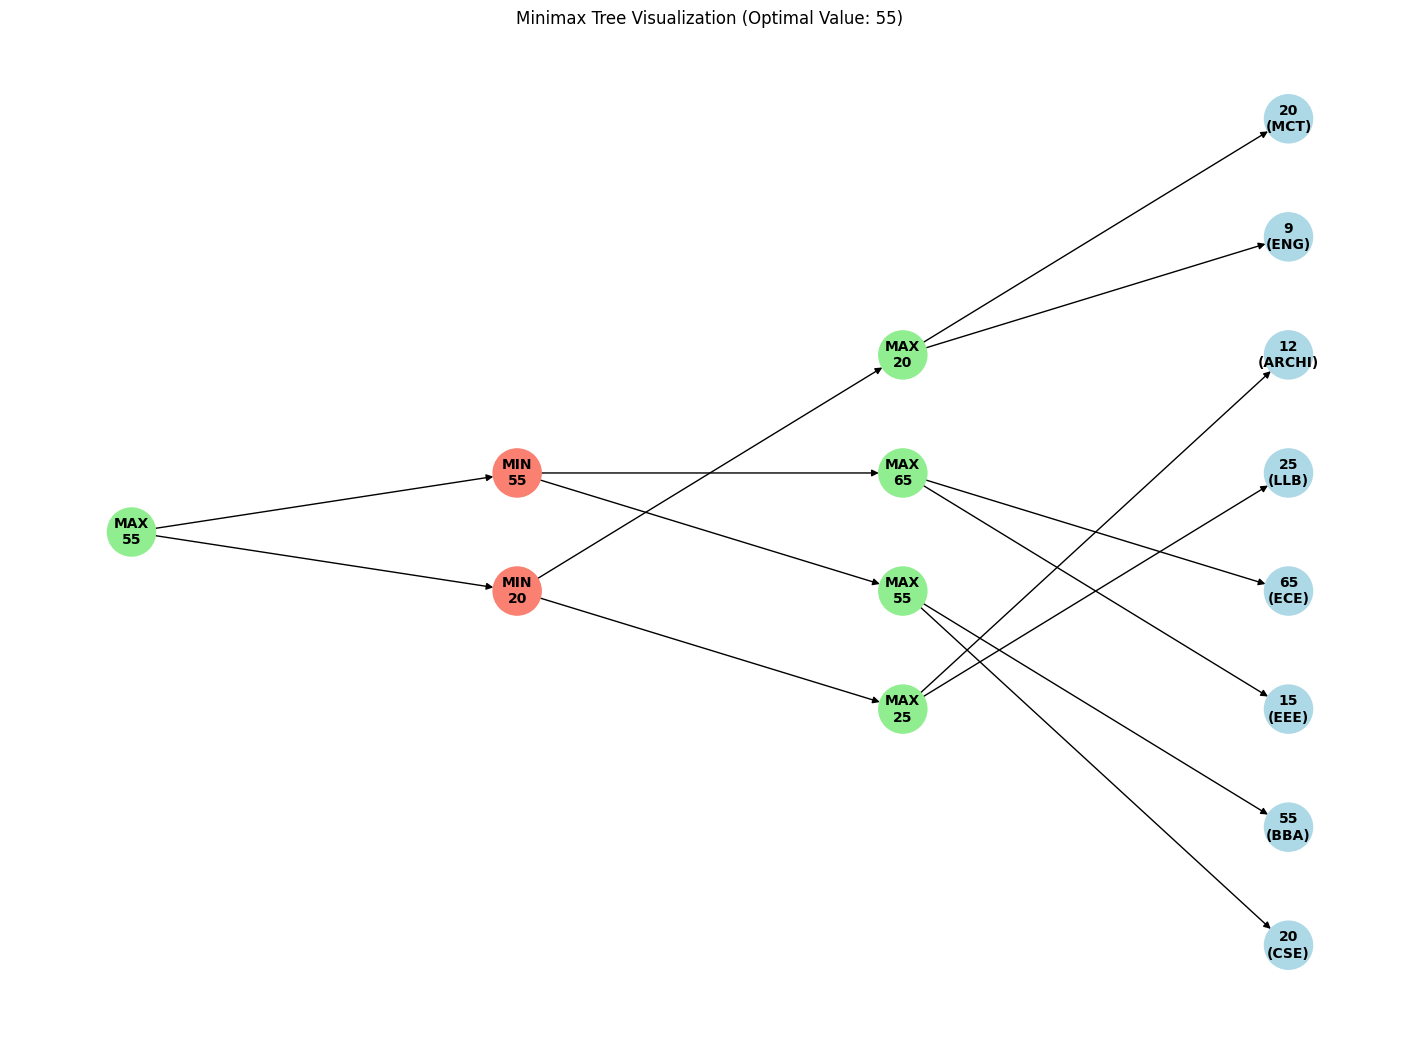

In [ ]:
import math
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Updated minimax function to accept extra_info for leaf labels
def minmax_tree(curDepth, nodeIndex, maxTurn, scores, targetDepth, G, extra_info=None, parent=None):
    if curDepth == targetDepth:
        # Leaf node: label shows score + extra info (if given)
        if extra_info:
            node_label = f"{scores[nodeIndex]}\n({extra_info[nodeIndex]})"
        else:
            node_label = f"{scores[nodeIndex]}"
        G.add_node(nodeIndex, label=node_label, depth=curDepth, maxTurn=maxTurn)
        if parent is not None:
            G.add_edge(parent, nodeIndex)
        return scores[nodeIndex]

    node_id = f"{curDepth}-{nodeIndex}"
    G.add_node(node_id, label="", depth=curDepth, maxTurn=maxTurn)
    if parent is not None:
        G.add_edge(parent, node_id)

    left_val = minmax_tree(curDepth + 1, nodeIndex * 2, not maxTurn, scores, targetDepth, G, extra_info, node_id)
    right_val = minmax_tree(curDepth + 1, nodeIndex * 2 + 1, not maxTurn, scores, targetDepth, G, extra_info, node_id)

    value = max(left_val, right_val) if maxTurn else min(left_val, right_val)
    G.nodes[node_id]['label'] = f"{'MAX' if maxTurn else 'MIN'}\n{value}"
    return value

# === Step 1: Read data from CSV ===
csv_path = "/content/personal_profiles.csv"  # Replace with your CSV file path
df = pd.read_csv(csv_path)

scores = df["Age"].tolist()
extra_info = df["Background"].tolist()  # Replace "Background" with your desired extra column name

length = len(scores)
if (length & (length - 1)) != 0:
    raise ValueError("Number of scores must be a power of 2 for a perfect binary tree")

treeDepth = int(math.log2(length))

# Create graph
G = nx.DiGraph()

# Run minimax and build tree with extra info
root_value = minmax_tree(0, 0, True, scores, treeDepth, G, extra_info)

print(f"The optimal minimax value is: {root_value}")

# Visualization
plt.figure(figsize=(14, 10))
pos = nx.multipartite_layout(G, subset_key="depth")

# Node colors by maxTurn (MAX=green, MIN=red, leaf=lightblue)
colors = []
for node in G.nodes():
    attr = G.nodes[node]
    if attr['depth'] == treeDepth:
        colors.append('lightblue')  # leaf
    elif attr['maxTurn']:
        colors.append('lightgreen')
    else:
        colors.append('salmon')

nx.draw(G, pos, with_labels=False, node_color=colors, node_size=1200, arrows=True)

# Draw node labels separately (multiline)
labels = {node: G.nodes[node]['label'] for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_weight='bold')

plt.title(f"Minimax Tree Visualization (Optimal Value: {root_value})")
plt.axis('off')
plt.show()
